In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
import pcmdpy as ppy
from astropy.io import fits
%matplotlib inline

GPU acceleration enabled


In [2]:
res = {}
res['lin'] = ppy.plotting.ResultsPlotter('results/m49_test_lin_tau.csv', run_name='M49 Linear')
res['log'] = ppy.plotting.ResultsPlotter('results/m49_test_log_tau.csv', run_name='M49 Log')
res['mono'] = ppy.plotting.ResultsPlotter('results/m49_test_lin_mono_tau.csv', run_name='M49 Mono')

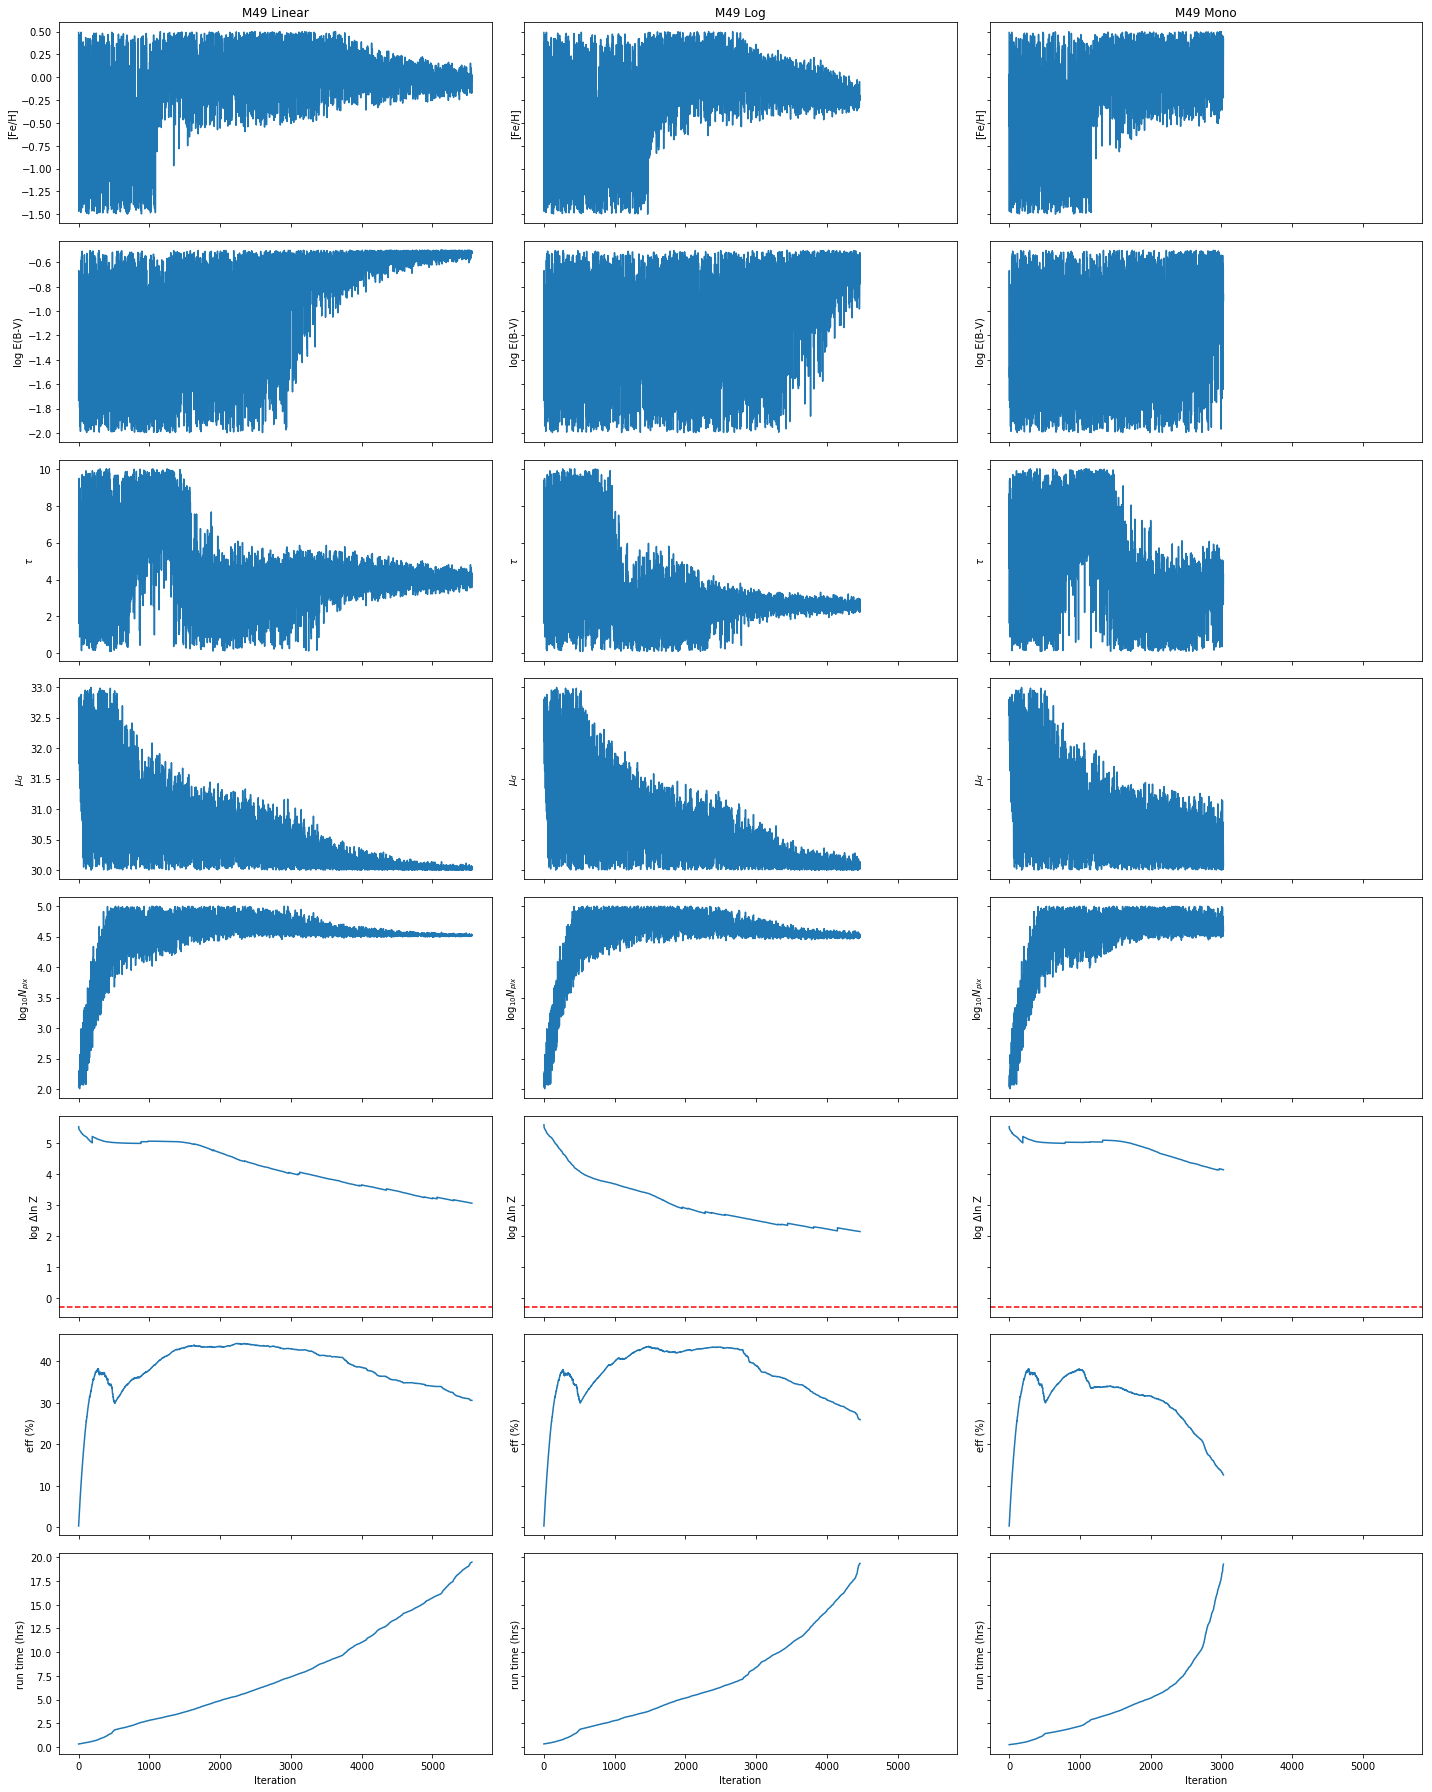

In [3]:
fig, axes = plt.subplots(ncols=3, nrows=8, figsize=(20, 25), sharex=True, sharey='row')
res['lin'].plot_chains(axes=axes[:,0])
res['log'].plot_chains(axes=axes[:,1])
res['mono'].plot_chains(axes=axes[:,2])
plt.tight_layout()

In [4]:
try:
    ppy.gpu_utils.initialize_gpu(n=0)
    __GPU_AVAIL = True
except:
    __GPU_AVAIL = False

using given n: 0
Starting SourceModule Code
Past the SourceModule code
CUDAC Available


In [5]:
__GPU_AVAIL

True

In [6]:
f = ppy.instrument.default_m49_filters()

In [7]:
iso_model = ppy.isochrones.Isochrone_Model(f)

starting manual interpolation
done with interpolation


In [8]:
driv = ppy.driver.Driver(iso_model, gpu=__GPU_AVAIL)

In [9]:
res['lin'].get_chains().columns

Index(['logfeh_mean', 'logdust_med', 'tau', 'dmod', 'logNpix'], dtype='object')

In [10]:
params = ['logfeh_mean', 'logdust_med', 'logNpix', 'tau', 'dmod']

In [11]:
g = ppy.galaxy.TauFull(res['lin'].get_chains()[params].values[-1])

In [15]:
pcmd_data = np.loadtxt('../data/m49_testannulus_z-gz.dat', unpack=True)

In [64]:
bins = [np.arange(22, 25, 0.05), np.arange(-1, 4, 0.05)]

In [88]:
def compare(params, lm=2):
    g.set_params(params)
    fig, axes = plt.subplots(ncols=3, figsize=(12, 5), sharey=True, sharex=True)
    pcmd_model, _ = driv.simulate(g, 512, fixed_seed=True, shot_noise=True, sky_noise=None, downsample=5)
    ppy.plotting.plot_pcmd(pcmd_model, axes=axes[0], bins=bins, title=str(params))
    ppy.plotting.plot_pcmd(pcmd_data, axes=axes[1], bins=bins, title='Data')
    ppy.plotting.plot_pcmd_residual(pcmd_model, pcmd_data, like_mode=lm, bins=bins, axes=axes[2])
    for i in range(3):
        ppy.plotting.plot_isochrone(iso_model, dmod=31, axes=axes[i])
    plt.tight_layout()
    axes[0].set_ylim([25, 22])
    return axes

CPU times: user 2.53 s, sys: 677 ms, total: 3.21 s
Wall time: 3.62 s


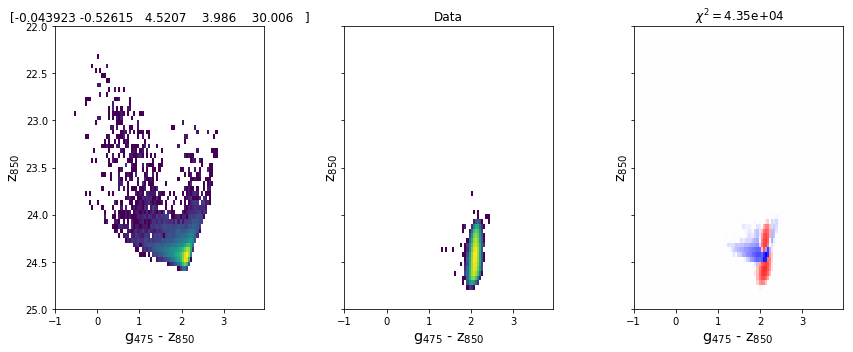

In [89]:
%%time
axes = compare(res['lin'].get_chains()[params].values[-1])

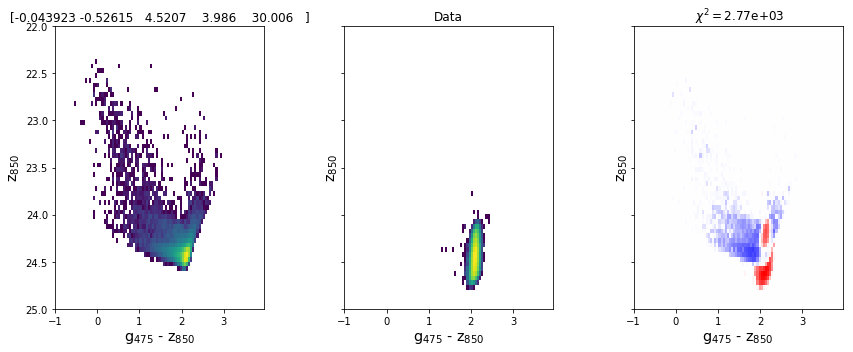

In [90]:
axes = compare(res['lin'].get_chains()[params].values[-1], lm=1)

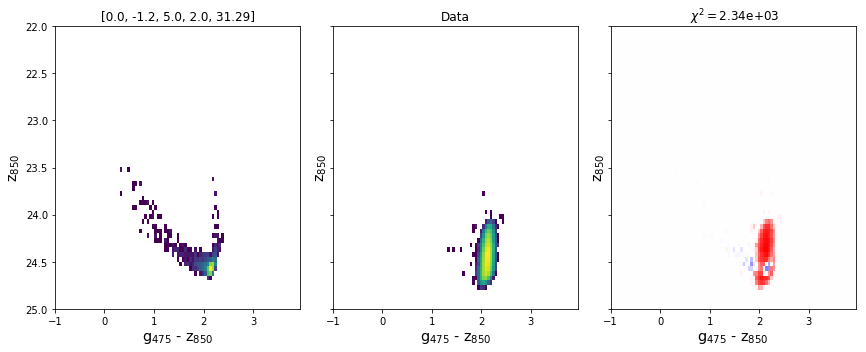

In [91]:
axes = compare([0., -1.2, 5.0, 2.0, 31.29], lm=1)